In [292]:
# Plotting and math imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

import pandas as pd

from datetime import datetime
from typing import List, Optional, Dict

from scipy import stats


## Load the ILI data and get column names

The spatially joined data we will load are created by joining `EC_LOF_Risk` table (spatialized onto pipeline segments) onto `cleaned_ILI_<year>` in ArcMap. In the import/export process, the resulting tables' column names are screwed up.

Here we load the originally `cleaned_ILI_<year>.csv` file that's imported into ArcMap and get the column names, so we can fix them later. This fix will allow us to use previous code written to filter out certain anomaly types.

In [293]:
dir_name = r"C:\Users\A1YU\OneDrive - PGE\Documents\code\ModelPerformance\processed_data"
cleaned_ILI_csv_name = "cleaned_ILI_2022.csv"
file_name = fr'{dir_name}\{cleaned_ILI_csv_name}'

In [294]:
# Read the file
file_name = fr'{dir_name}\{cleaned_ILI_csv_name}'
original_cleaned_ILI_data = pd.read_csv(file_name, low_memory=False)

# Output the number of rows
print("Total rows: {0}".format(len(original_cleaned_ILI_data)))
ILI_headers = list(original_cleaned_ILI_data.columns)

Total rows: 111969


In [295]:
# Delete to save memory
if original_cleaned_ILI_data is not None:
    del original_cleaned_ILI_data

In [296]:
ILI_headers = [s.strip() for s in ILI_headers]
ILI_headers

['Vendor',
 'Source',
 'Route',
 'Route_NoPrefix',
 'MP1',
 'MP2',
 'Year',
 'ILI Project Name',
 'ML Survey Date',
 'Alignment Comment',
 'Joint / US GW Number',
 'ILI Survey Distance (ft)',
 'Joint Length (ft)',
 'From U/S GW (ft)',
 'To D/S GW (ft)',
 'Identification',
 'Comment',
 'Tool Speed (mph)',
 'WT (in)',
 'SMYS (PSI)',
 'MAOP (PSI)',
 'OD (in)',
 'Longseam Visible',
 'Seam Pos.',
 'Depth (%)',
 'Depth* (with tool tolerances)',
 'OD Reduction (%)',
 'Length (in)',
 'Width (in)',
 "O'clock",
 'Internal',
 'Bend Radius (D)',
 'Bend Angle (degrees)',
 'Bend Direction',
 'POF Category',
 'Associated Tool Tolerance',
 'Anomaly ID',
 'Estimated Failure Pressure (Pf)',
 'Pf/MAOP',
 'Pf* (with tool tolerances)',
 'Pf*/MAOP',
 'TotalBend Strain',
 'Bend - Vert Strain Component',
 'Bend - Horiz Strain Component',
 'Internal Dent Strain',
 'External Dent Strain',
 'Easting',
 'Northing',
 'Latitude',
 'Longitude',
 'Elevation',
 'U/S Reference',
 'Dist. To U/S Ref [ft]',
 'D/S Referenc

## Load and clean the spatially-joined data saved in csv

In [297]:
ILI_ECLOF_Pipesegment_joined = r"C:\Users\A1YU\OneDrive - PGE\Documents\code\ModelPerformance\processed_data\SJ_target=ILI_join=EC_spatialized_to_Pipesegment_2022.csv"
master_dataset = pd.read_csv(ILI_ECLOF_Pipesegment_joined, low_memory=False)

In [298]:
master_dataset.columns.values

array(['FID', 'OBJECTID', 'Vendor', 'Source', 'Route', 'Route_NoPr',
       'MP1', 'MP2', 'Year', 'ILI_Projec', 'ML_Survey', 'Alignment',
       'Joint___US', 'ILI_Survey', 'Joint_Leng', 'From_U_S_G',
       'To_D_S_GW', 'Identifica', 'Comment', 'Tool_Speed', 'WT__in_',
       'SMYS__PSI_', 'MAOP__PSI_', 'OD__in_', 'Longseam_V', 'Seam_Pos_',
       'Depth____', 'Depth___wi', 'OD_Reducti', 'Length__in',
       'Width__in_', 'O_clock', 'Internal', 'Bend_Radiu', 'Bend_Angle',
       'Bend_Direc', 'POF_Catego', 'Associated', 'Anomaly_ID',
       'Estimated', 'Pf_MAOP', 'Pf___with', 'Pf__MAOP', 'TotalBend',
       'Bend___Ver', 'Bend___Hor', 'Internal_D', 'External_D', 'Easting',
       'Northing', 'Latitude', 'Longitude', 'Elevation', 'U_S_Refere',
       'Dist__To_U', 'D_S_Refere', 'Dist__To_D', 'ILI_Vendor',
       'PG_E_Stati', 'OBJECTID_1', 'sortid', 'route_1', 'beginstati',
       'beginsta_1', 'endstation', 'endstati_1', 'Mainline_C',
       'Dry_Chlori', 'Third_Part', 'Third_Pa_1', 

The field names gets screwed up/cut off during the spatial-join and writing to csv process (might need to do all this in ArcPy..). Let's rename them to actual names.

Everything from `'Vendor'` to `'PG_E_stati'` correspond to original ILI column names. So just replace those.

In [299]:
master_dataset.columns.values[2: 2 + len(ILI_headers)] = ILI_headers

In [300]:
master_dataset.columns.values

array(['FID', 'OBJECTID', 'Vendor', 'Source', 'Route', 'Route_NoPrefix',
       'MP1', 'MP2', 'Year', 'ILI Project Name', 'ML Survey Date',
       'Alignment Comment', 'Joint / US GW Number',
       'ILI Survey Distance (ft)', 'Joint Length (ft)',
       'From U/S GW (ft)', 'To D/S GW (ft)', 'Identification', 'Comment',
       'Tool Speed (mph)', 'WT (in)', 'SMYS (PSI)', 'MAOP (PSI)',
       'OD (in)', 'Longseam Visible', 'Seam Pos.', 'Depth (%)',
       'Depth* (with tool tolerances)', 'OD Reduction (%)', 'Length (in)',
       'Width (in)', "O'clock", 'Internal', 'Bend Radius (D)',
       'Bend Angle (degrees)', 'Bend Direction', 'POF Category',
       'Associated Tool Tolerance', 'Anomaly ID',
       'Estimated Failure Pressure (Pf)', 'Pf/MAOP',
       'Pf* (with tool tolerances)', 'Pf*/MAOP', 'TotalBend Strain',
       'Bend - Vert Strain Component', 'Bend - Horiz Strain Component',
       'Internal Dent Strain', 'External Dent Strain', 'Easting',
       'Northing', 'Latitude', 'Lon

In [301]:
# These are the fields we also care about
FP_fields = ['Estimated Failure Pressure (Pf)', 'Pf/MAOP', 'Pf* (with tool tolerances)', 'Pf*/MAOP']

In [302]:
# Now correct the EC_LOF_Risk values
calculated_risk_fields =  ['EC_LOF_Leak', 'EC_LOF_Rupture']
master_dataset.rename(
    columns={
        "EC_LOF_Rup": "EC_LOF_Rupture",
        "EC_LOF_Lea": "EC_LOF_Leak",
    },
    inplace=True
)

In [303]:
# Also get the stationing number, so we are not simply comparing individual anomaly to pipe values
location_fields = ["route", "beginstationseriesid", "beginstationnum", "endstationseriesid", "endstationnum"]
master_dataset.rename(
    columns={
        "Route": "route",
        "beginstati": "beginstationseriesid",
        "beginsta_1": "beginstationnum",
        "endstation": "endstationseriesid",
        "endstati_1": "endstationnum",
    },
    inplace=True
)

In [304]:
# We als want to later compare the risk values to volumetric loss, so keep track of those fields as well
volumetric_loss_fields = ["Identification", "Depth (%)", "Internal", "WT (in)", "OD (in)", "Width (in)", "Length (in)"]

Sanity check, total ILI mileage for 2022 according to Satvinder's [dashboard](https://pge.sharepoint.com/sites/TIMPRisk/SitePages/TIMP%20ILI%20Assessment.aspx?xsdata=MDV8MDF8fDI2Y2YwODcyZjQ3YTRkNDJlZTJmMDhkYmRiMTliZjA0fDQ0YWU2NjFhZWNlNjQxYWFiYzk2N2MyYzg1YTA4OTQxfDB8MHw2MzgzNDQ2NzU4Mjg0OTM4NzF8VW5rbm93bnxWR1ZoYlhOVFpXTjFjbWwwZVZObGNuWnBZMlY4ZXlKV0lqb2lNQzR3TGpBd01EQWlMQ0pRSWpvaVYybHVNeklpTENKQlRpSTZJazkwYUdWeUlpd2lWMVFpT2pFeGZRPT18MXxMMk5vWVhSekx6RTVPbU5qTlRnMU56YzVMVEpsT0dFdE5EUmhNeTA1WVRBMkxUSXdZVGRpTkRabU9UUmhNRjlsTkdSa05XVmxPUzAyWWpOakxUUTJZamN0WVdSaU5pMWtOV1ZqTWpsbVpEZGxOekpBZFc1eExtZGliQzV6Y0dGalpYTXZiV1Z6YzJGblpYTXZNVFk1T0RnM01EYzRNakk0TVE9PXwyNWZmZWM1NDI0NjQ0OWIxZWUyZjA4ZGJkYjE5YmYwNHw2NDgwOGMwYjdiM2E0YTJkYmU5ZWQ3YzFhZjNmMjM3OQ%3D%3D&sdata=blBhSWhrZ1JDaE1rY1MyZyswRDEweTZMaEllM3RvakNNRUJyNTdWM09lOD0%3D&ovuser=44ae661a-ece6-41aa-bc96-7c2c85a08941%2CA1YU%40pge.com&OR=Teams-HL&CT=1703124907343&clickparams=eyJBcHBOYW1lIjoiVGVhbXMtRGVza3RvcCIsIkFwcFZlcnNpb24iOiI0OS8yMzExMzAyODcxNCIsIkhhc0ZlZGVyYXRlZFVzZXIiOmZhbHNlfQ%3D%3D) is 368.48 miles

In [305]:
# Sanity check, total mileage for 2022, using stationing
unique_segments = master_dataset.drop_duplicates(subset=["beginstationseriesid", "beginstationnum", "endstationnum"])
ILI_mileage = np.sum((unique_segments["endstationnum"] - unique_segments["beginstationnum"]).to_numpy()) / 5280
print(f"Found {ILI_mileage:.3f} miles of ILI data")

Found 379.768 miles of ILI data


In [337]:
# Sanity check, get total mileage from MP markers
unique_MP_pairs = master_dataset[["route", "MP1", "MP2"]].drop_duplicates()
unique_MP_pairs["diff_MP"] = unique_MP_pairs["MP2"] - unique_MP_pairs["MP1"]
unique_MP_pairs["diff_MP"].sum()

368.48

In [306]:
# Get the data frame with just these fields
relevant_fields = FP_fields + calculated_risk_fields + location_fields + volumetric_loss_fields
performance_df = master_dataset[relevant_fields]

In [307]:
performance_df.head()

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
0,0.0,0.0,0.0,0.0,1.154881e-07,0.0,DFM-1209-01,39887,5405.80,39887,5415.40,Girth Weld,0.0,,0.280,6.625,0.0,0.0
1,0.0,0.0,0.0,0.0,1.154881e-07,0.0,DFM-1209-01,39887,5405.80,39887,5415.40,Bend,0.0,,0.280,6.625,0.0,0.0
2,0.0,0.0,0.0,0.0,1.154881e-07,0.0,DFM-1209-01,39887,5405.80,39887,5415.40,Girth Weld,0.0,,0.280,6.625,0.0,0.0
3,0.0,0.0,0.0,0.0,9.166055e-08,0.0,DFM-1209-01,39887,37053.41,39887,37147.41,Girth Weld,0.0,,0.188,6.625,0.0,0.0
4,0.0,0.0,0.0,0.0,9.166055e-08,0.0,DFM-1209-01,39887,37053.41,39887,37147.41,Girth Weld,0.0,,0.188,6.625,0.0,0.0


I think when all the failure pressure values are NULL, they get imported into ArcMAP as 0. So need to change them to `NaN`.

The risk values can actually be 0, judging by the mariner DB output.

In [308]:
master_dataset[FP_fields] = master_dataset[FP_fields].replace(0, np.nan)
performance_df = master_dataset[relevant_fields]

In [309]:
performance_df.head()

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
0,NaN,NaN,NaN,NaN,1.154881e-07,0.0,DFM-1209-01,39887,5405.80,39887,5415.40,Girth Weld,0.0,,0.280,6.625,0.0,0.0
1,NaN,NaN,NaN,NaN,1.154881e-07,0.0,DFM-1209-01,39887,5405.80,39887,5415.40,Bend,0.0,,0.280,6.625,0.0,0.0
2,NaN,NaN,NaN,NaN,1.154881e-07,0.0,DFM-1209-01,39887,5405.80,39887,5415.40,Girth Weld,0.0,,0.280,6.625,0.0,0.0
3,NaN,NaN,NaN,NaN,9.166055e-08,0.0,DFM-1209-01,39887,37053.41,39887,37147.41,Girth Weld,0.0,,0.188,6.625,0.0,0.0
4,NaN,NaN,NaN,NaN,9.166055e-08,0.0,DFM-1209-01,39887,37053.41,39887,37147.41,Girth Weld,0.0,,0.188,6.625,0.0,0.0


Failure pressure-related fields are NaN when it's something like "Girth Weld" or "Bend". These "anomalies" are not related to external corrosion. So we can filter these out and keep only anomaly rows that have legitimate signs of external corrosion.

In [310]:
from EC_corrosion_stats import (
    filter_identifications,
    filter_manufacturing_anomalies,
    get_external_anomaly_row_mask,
)
unique_identifications, filtered_performance_df = filter_identifications(performance_df)
filtered_performance_df = filter_manufacturing_anomalies(filtered_performance_df)
has_EC_row_mask = get_external_anomaly_row_mask(filtered_performance_df)


9.211% of all identifications has only 1 occurence
Total 5878 manufacturing Identifications
Total 111667 Identifications
 5.264% of identifications are manufacturing related
Total 105789 non-manufacturing identifications


In [311]:
filtered_performance_df = filtered_performance_df.loc[has_EC_row_mask]

In [312]:
filtered_performance_df

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
995,1610.35,3.44,1609.07,3.44,6.955531e-08,0.000000,L-021H,34364,7679.53,34364,7795.44,metal loss corrosion,19.0,external,0.312,24.0,0.62,0.33
997,1609.92,3.44,1608.02,3.44,6.955531e-08,0.000000,L-021H,34364,7679.53,34364,7795.44,metal loss corrosion,15.0,external,0.312,24.0,1.34,0.43
998,1610.43,3.44,1609.10,3.44,6.955531e-08,0.000000,L-021H,34364,7679.53,34364,7795.44,metal loss corrosion,17.0,external,0.312,24.0,0.59,0.35
1000,1568.64,3.35,1534.89,3.28,6.955531e-08,0.000000,L-021H,34364,7679.53,34364,7795.44,cluster,35.0,external,0.312,24.0,3.21,1.46
1001,1582.85,3.38,1549.27,3.31,6.955531e-08,0.000000,L-021H,34364,7679.53,34364,7795.44,metal loss corrosion,19.0,external,0.312,24.0,0.59,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107340,1632.61,1.57,1617.54,1.56,0.000000e+00,0.000024,L-401,37900,2151216.68,37900,2155254.93,metal loss corrosion,19.0,external,0.372,36.0,2.28,1.59
107341,1625.67,1.56,1605.71,1.54,0.000000e+00,0.000024,L-401,37900,2151216.68,37900,2155254.93,metal loss corrosion,19.0,external,0.372,36.0,2.08,1.87
107342,1641.10,1.58,1625.99,1.56,0.000000e+00,0.000024,L-401,37900,2151216.68,37900,2155254.93,metal loss corrosion,10.0,external,0.372,36.0,2.43,1.79
110508,1621.78,1.56,1599.93,1.54,0.000000e+00,0.000024,L-401,37900,2171025.01,37900,2174244.03,metal loss corrosion,20.0,external,0.372,36.0,2.02,1.94


In [313]:
filtered_performance_df[filtered_performance_df["Pf/MAOP"].isnull()]

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
3292,NaN,NaN,NaN,NaN,0.000000e+00,0.000049,L-021H,44413,25006.20,44413,25047.81,eccentric casing,0.0,external,0.250,24.00,0.00,0.00
5721,NaN,NaN,NaN,NaN,0.000000e+00,0.000039,L-021H,44413,33545.80,44413,33552.09,eccentric casing,0.0,external,0.250,24.00,0.00,0.00
21056,NaN,NaN,NaN,NaN,1.506177e-07,0.000000,L-109,37731,39023.90,37731,39133.90,eccentric casing,0.0,external,0.344,24.00,0.00,0.00
21182,NaN,NaN,NaN,NaN,1.506177e-07,0.000000,L-109,37731,39247.10,37731,39253.90,eccentric casing,0.0,external,0.313,24.00,0.00,0.00
21524,NaN,NaN,NaN,NaN,1.506177e-07,0.000000,L-109,37731,43554.20,37731,43558.90,eccentric casing,0.0,external,0.313,24.00,0.00,0.00
24606,NaN,NaN,NaN,NaN,1.290221e-07,0.000000,L-109,37731,96454.18,37731,96456.39,eccentric casing,0.0,external,0.313,24.00,0.00,0.00
39631,NaN,NaN,NaN,NaN,0.000000e+00,0.000006,L-138,35530,176584.77,35530,176633.76,gouge,0.0,external,0.250,12.75,1.99,0.41
39632,NaN,NaN,NaN,NaN,0.000000e+00,0.000006,L-138,35530,176584.77,35530,176633.76,gouge,0.0,external,0.250,12.75,1.22,0.36
39633,NaN,NaN,NaN,NaN,0.000000e+00,0.000006,L-138,35530,176584.77,35530,176633.76,gouge,0.0,external,0.250,12.75,1.62,0.47
39634,NaN,NaN,NaN,NaN,0.000000e+00,0.000006,L-138,35530,176584.77,35530,176633.76,gouge,0.0,external,0.250,12.75,0.97,0.73


There are still some NaN entries, but the `Identification` values indicate they can be ignored as they are not really external metal corrosion entries, so we can safely drop them.

In [314]:
for field in FP_fields:
    filtered_performance_df = filtered_performance_df[
        filtered_performance_df[field].notna()
    ]
    
for field in FP_fields:
    print(filtered_performance_df[filtered_performance_df[field].isnull()])

Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool tolerances), Pf*/MAOP, EC_LOF_Leak, EC_LOF_Rupture, route, beginstationseriesid, beginstationnum, endstationseriesid, endstationnum, Identification, Depth (%), Internal, WT (in), OD (in), Width (in), Length (in)]
Index: []
Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool tolerances), Pf*/MAOP, EC_LOF_Leak, EC_LOF_Rupture, route, beginstationseriesid, beginstationnum, endstationseriesid, endstationnum, Identification, Depth (%), Internal, WT (in), OD (in), Width (in), Length (in)]
Index: []
Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool tolerances), Pf*/MAOP, EC_LOF_Leak, EC_LOF_Rupture, route, beginstationseriesid, beginstationnum, endstationseriesid, endstationnum, Identification, Depth (%), Internal, WT (in), OD (in), Width (in), Length (in)]
Index: []
Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool

Now nothing is NAN, we only have legitimate anomalies!

Text(0.5, 0.98, 'Failure pressure vs. Leak LOF')

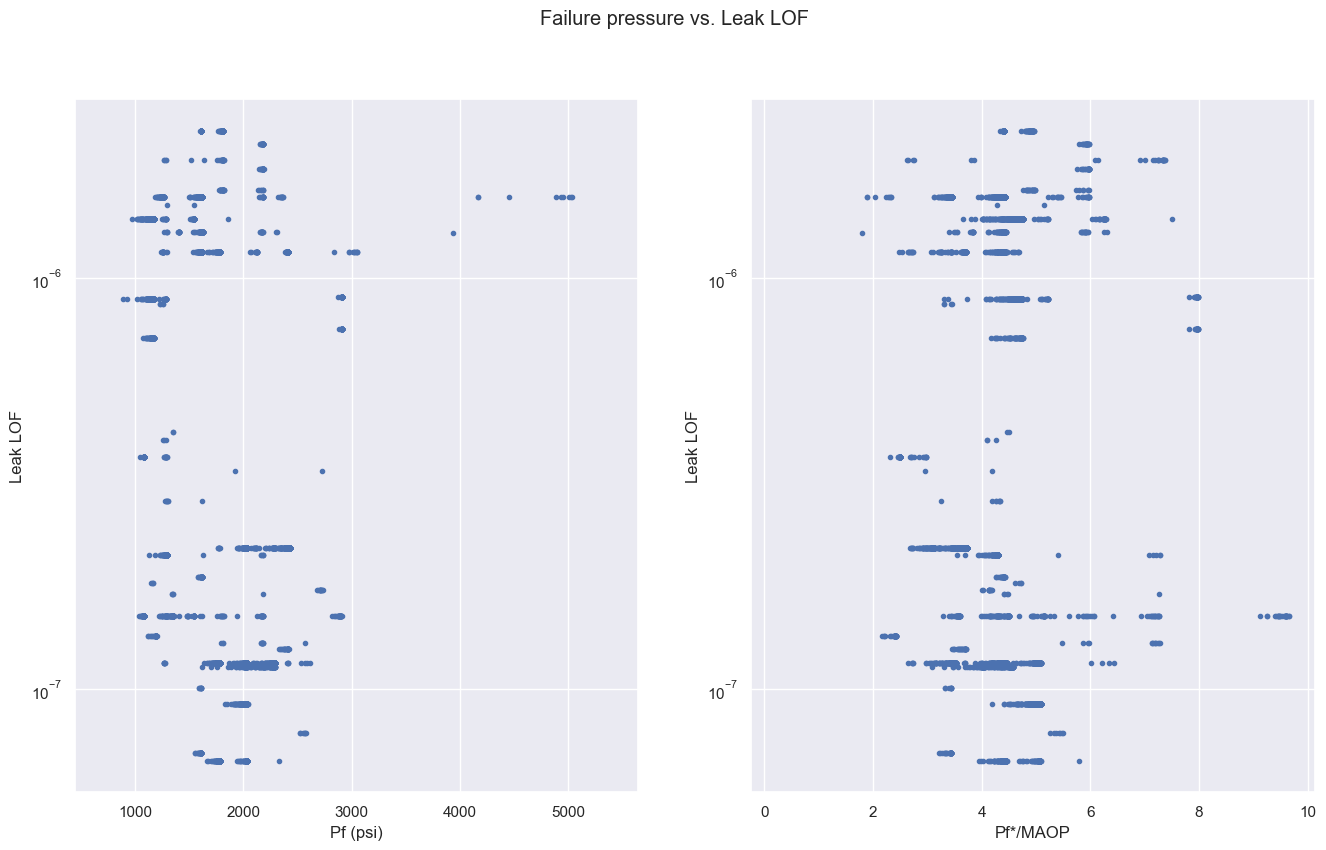

In [315]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(
    filtered_performance_df["Estimated Failure Pressure (Pf)"],
    filtered_performance_df["EC_LOF_Leak"],
    "."
)
plt.xlabel("Pf (psi)")
plt.ylabel("Leak LOF")
plt.yscale("log")

plt.subplot(1, 2, 2)
plt.plot(
    filtered_performance_df["Pf*/MAOP"],
    filtered_performance_df["EC_LOF_Leak"],
    "."
)
plt.xlabel("Pf*/MAOP")
plt.ylabel("Leak LOF")
plt.yscale("log")
plt.suptitle("Failure pressure vs. Leak LOF")

Text(0.5, 0.98, 'Failure pressure vs. Rupture LOF')

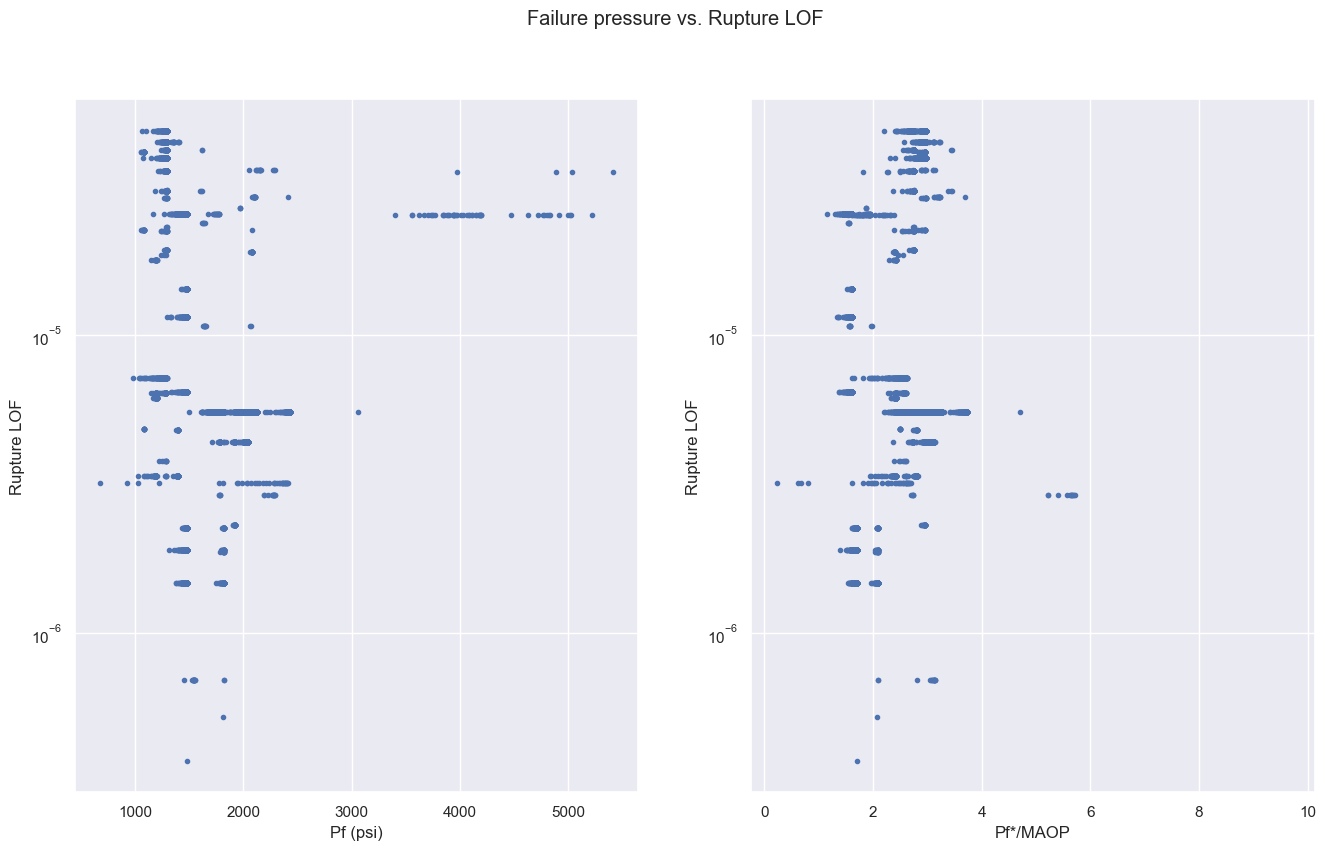

In [316]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(
    filtered_performance_df["Estimated Failure Pressure (Pf)"],
    filtered_performance_df["EC_LOF_Rupture"],
    "."
)
plt.xlabel("Pf (psi)")
plt.ylabel("Rupture LOF")
plt.yscale("log")

plt.subplot(1, 2, 2)
plt.plot(
    filtered_performance_df["Pf*/MAOP"],
    filtered_performance_df["EC_LOF_Rupture"],
    "."
)
plt.xlabel("Pf*/MAOP")
plt.ylabel("Rupture LOF")
plt.yscale("log")
plt.suptitle("Failure pressure vs. Rupture LOF")

## Aggregate anomalies' Pf per dynamic segment

Jackson says:

> In the EC_LOF table, each segments is defined by it's beginstationseriesid, it's beginstationnum and it's endstationnum so I'd aggregate on those three attributes

In [317]:
# How many different `beginstationseriesid` are there?
num_unique_beginstationseriesid = len(np.unique(filtered_performance_df["beginstationseriesid"]))
num_unique_endstationseriesid = len(np.unique(filtered_performance_df["endstationseriesid"]))
assert num_unique_beginstationseriesid == num_unique_endstationseriesid,\
"We expect number of unique beginstationseriesid equal to that of endstationseriesid"

print(f"number of unique beginstationseriesid={num_unique_beginstationseriesid}, unique endstationseriesid={num_unique_endstationseriesid}")

# Are begin and end stationseries id the same?
same_begin_and_end_stationseriesid = np.all(filtered_performance_df["beginstationseriesid"] == filtered_performance_df["endstationseriesid"])
print(f"begin and end stationseriesid are {'the same' if same_begin_and_end_stationseriesid else 'not the same'}")

number of unique beginstationseriesid=42, unique endstationseriesid=42
begin and end stationseriesid are the same


Yes, so using `beginstationseriesid` should be enough.

In [318]:
stationing_vars = ["beginstationseriesid", "beginstationnum", "endstationnum"]
unique_segments = filtered_performance_df[stationing_vars].drop_duplicates()

In [319]:
display(unique_segments)
print(f"ILI data is mapped to {len(unique_segments)} unique risk-model dynamic pipe segments")

,beginstationseriesid,beginstationnum,endstationnum
995,34364,7679.53,7795.44
1016,34364,7951.95,8032.02
1023,34364,7865.06,7951.95
1045,34364,7599.10,7679.53
1623,34364,7795.44,7865.06
...,...,...,...
102137,31319,1936737.83,1936866.15
102668,31319,1929242.90,1930051.05
107340,37900,2151216.68,2155254.93
110508,37900,2171025.01,2174244.03


ILI data is mapped to 2762 unique risk-model dynamic pipe segments


In [320]:
# How many unique per-segment risk values are there?
print(f"Number of unique EC_LOF_Leak values: {len(np.unique(filtered_performance_df['EC_LOF_Leak']))}")
print(f"Number of unique EC_LOF_Rupture values: {len(np.unique(filtered_performance_df['EC_LOF_Rupture']))}")

Number of unique EC_LOF_Leak values: 40
Number of unique EC_LOF_Rupture values: 49


So this means multiple pipe segments can still have the same risk values, meaning the pipe-risk mapping is many-to-1.

But double check if the risk values for anomalies for each segment is the same -- they should be

In [321]:
num_dynamic_segments_with_multiple_LOF_leak = np.sum(filtered_performance_df.groupby(stationing_vars)["EC_LOF_Leak"].nunique() != 1)
num_dynamic_segments_with_multiple_LOF_rupture = np.sum(filtered_performance_df.groupby(stationing_vars)["EC_LOF_Rupture"].nunique() != 1)
print(
    f"Number of dynamic segments with multiple LOF leak={num_dynamic_segments_with_multiple_LOF_leak}, "
    f"with multiple LOF rupture={num_dynamic_segments_with_multiple_LOF_rupture}"
)
assert (num_dynamic_segments_with_multiple_LOF_leak == 0) and (num_dynamic_segments_with_multiple_LOF_rupture == 0),\
"Risk values for anomalies mapped to the same dynamic segment should be the same!"

Number of dynamic segments with multiple LOF leak=0, with multiple LOF rupture=0


Both of them are 0 -- so anomalies within the same dynamic segment are indeed asigned the same risk value, as they should!

--------

### Diagnostic code

In case they are not, diagnostic code below

In [322]:
%%script false --no-raise-error


result = filtered_df.groupby(stationing_vars)["EC_LOF_Leak"].nunique()
groups_with_varying_LOF_Leak = result[result != 1]

Couldn't find program: 'false'


In [323]:
%%script false --no-raise-error

np.sum(result != 1)

Couldn't find program: 'false'


In [324]:
%%script false --no-raise-error

len(groups_with_varying_LOF_Leak) / len(result)

Couldn't find program: 'false'


In [325]:
%%script false --no-raise-error

np.unique(groups_with_varying_LOF_Leak, return_counts=True)

Couldn't find program: 'false'


In [326]:
%%script false --no-raise-error

FP_fields

Couldn't find program: 'false'


In [327]:
%%script false --no-raise-error

stationing_vars

Couldn't find program: 'false'


In [328]:
%%script false --no-raise-error

filtered_df.columns

Couldn't find program: 'false'


In [329]:
%%script false --no-raise-error

from scipy import stats

diff_to_mode_perc = []

for (i, group) in enumerate(groups_with_varying_LOF_Leak.index):
    # if i > 2:
        # break?
    print(f"Group: {group}")
    group_rows = filtered_df[
        (filtered_df["beginstationseriesid"] == group[0])
        & (filtered_df["beginstationnum"] == group[1])
        & (filtered_df["endstationnum"] == group[2])
    ][["EC_LOF_Leak", "EC_LOF_Rupture"]] 
    print(group_rows)
    # What's the max diff?
    # max_diff = np.max(group_rows) - np.min(group_rows)
    # what percentage of the most common value?
    # mode_val = stats.mode(group_rows).mode
    # diff_to_mode_perc.append(max_diff / mode_val)
    # print(group_rows)
    # print(f"Max diff is {max_diff / mode_val * 100 :.3f}% of mode value")
    print("\n")

Couldn't find program: 'false'


In [330]:
%%script false --no-raise-error

np.unique(diff_to_mode_perc, return_counts=True)

Couldn't find program: 'false'


~~Are the difference in EC_LOF_Leak big enough to be significant? Why would a single pipe segment have different pipeline risk values?~~

~~This doesn't seem to make sense...each unique combination of `(beginstationseriesid, beginstationnum, endstationnum)` are supposed to represent a unique pipe segment, with a single EC_LOF value calculated.~~

~~But I'm seeing pipe "segments" aggregated this way can have up to 10 different risk values associated with them. Can this be accounted for spatial join errors? i.e. in a junction of pipe segments, multiple anomalies for different pipes get joined into the same?~~

~~Figure this out later...ask Gordon/Jackson. For now, just take the first value of these risk values...~~

----

----

### Plot figure with aggregation

Now we aggregate failure pressure from anomalies on pipe segments:
1. Mean
2. Min (less failure pressure = higher risk): makes sense for failure pressure

In [331]:
aggregation = {field: "mean" for field in FP_fields}
aggregation.update({field: "first" for field in calculated_risk_fields})
filtered_performance_df_grouped_by_mean = filtered_performance_df.groupby(stationing_vars).agg(aggregation).reset_index()

aggregation = {field: "min" for field in FP_fields}
aggregation.update({field: "first" for field in calculated_risk_fields})
filtered_performance_df_grouped_by_min = filtered_performance_df.groupby(stationing_vars).agg(aggregation).reset_index()

#### Initial plots with no regression lines

Not the final results.

Note the results seem to look better when the LOF is in linear rather than log-scale...

Text(0.5, 0.98, 'Failure pressure vs. Leak LOF, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min')

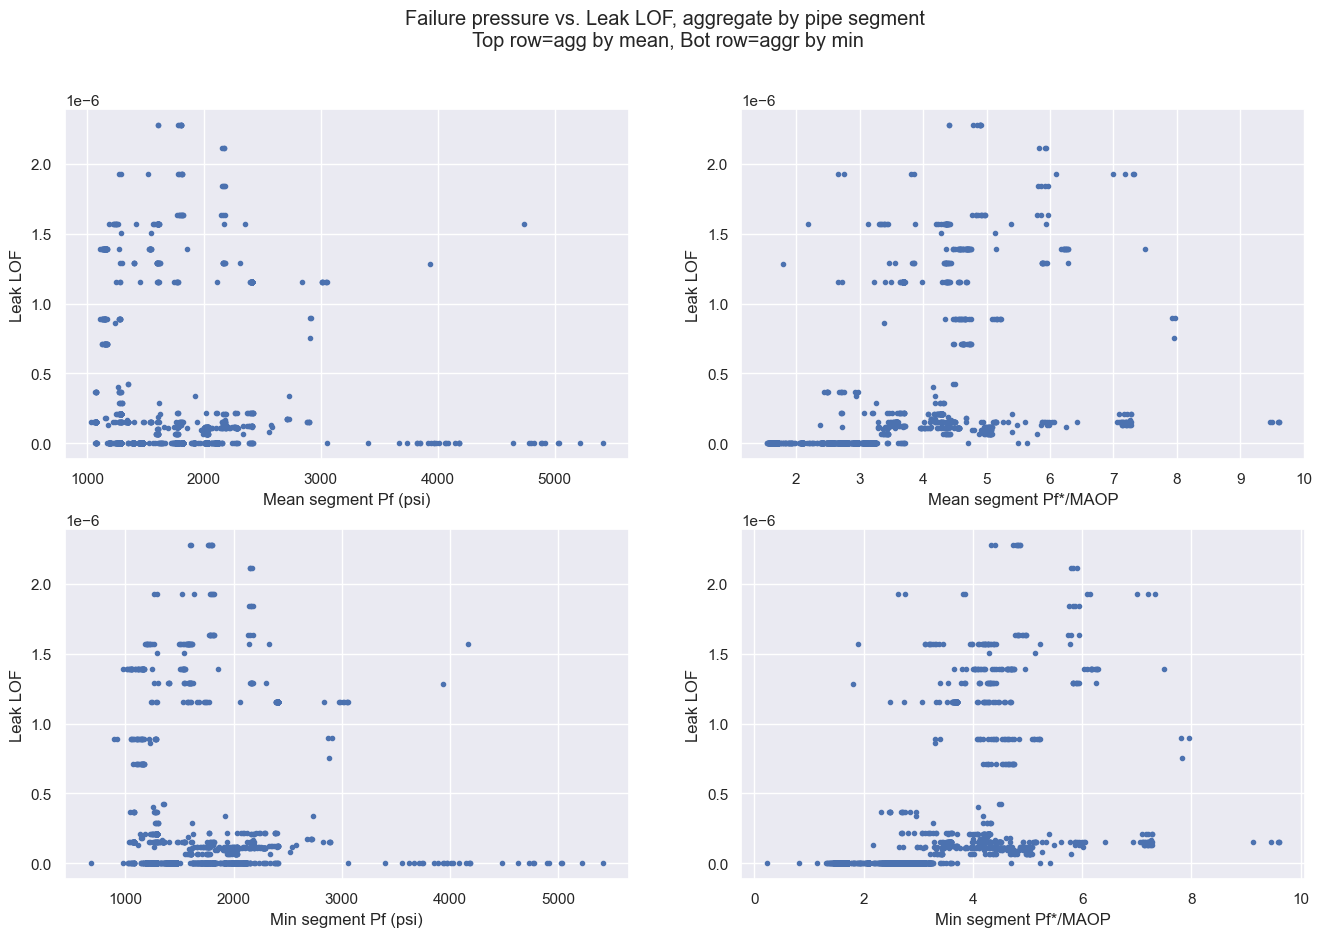

In [332]:
# Leak LOF:
x_field1 = "Estimated Failure Pressure (Pf)"
x_label1 = "Pf (psi)"
x_field2 = "Pf*/MAOP"
y_field = "EC_LOF_Leak"
y_label = "Leak LOF"

plt.figure(figsize=(16, 10))

# Top row = mean aggregation 
plt.subplot(2, 2, 1)
plt.plot(
    filtered_performance_df_grouped_by_mean["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 2)
plt.plot(
    filtered_performance_df_grouped_by_mean["Pf*/MAOP"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
# plt.suptitle("Failure pressure vs. Leak LOF, aggregate by pipe segment")

# Bot row = min aggregation
plt.subplot(2, 2, 3)
plt.plot(
    filtered_performance_df_grouped_by_min["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 4)
plt.plot(
    filtered_performance_df_grouped_by_min["Pf*/MAOP"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

Text(0.5, 0.98, 'Failure pressure vs. Rupture LOF, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min')

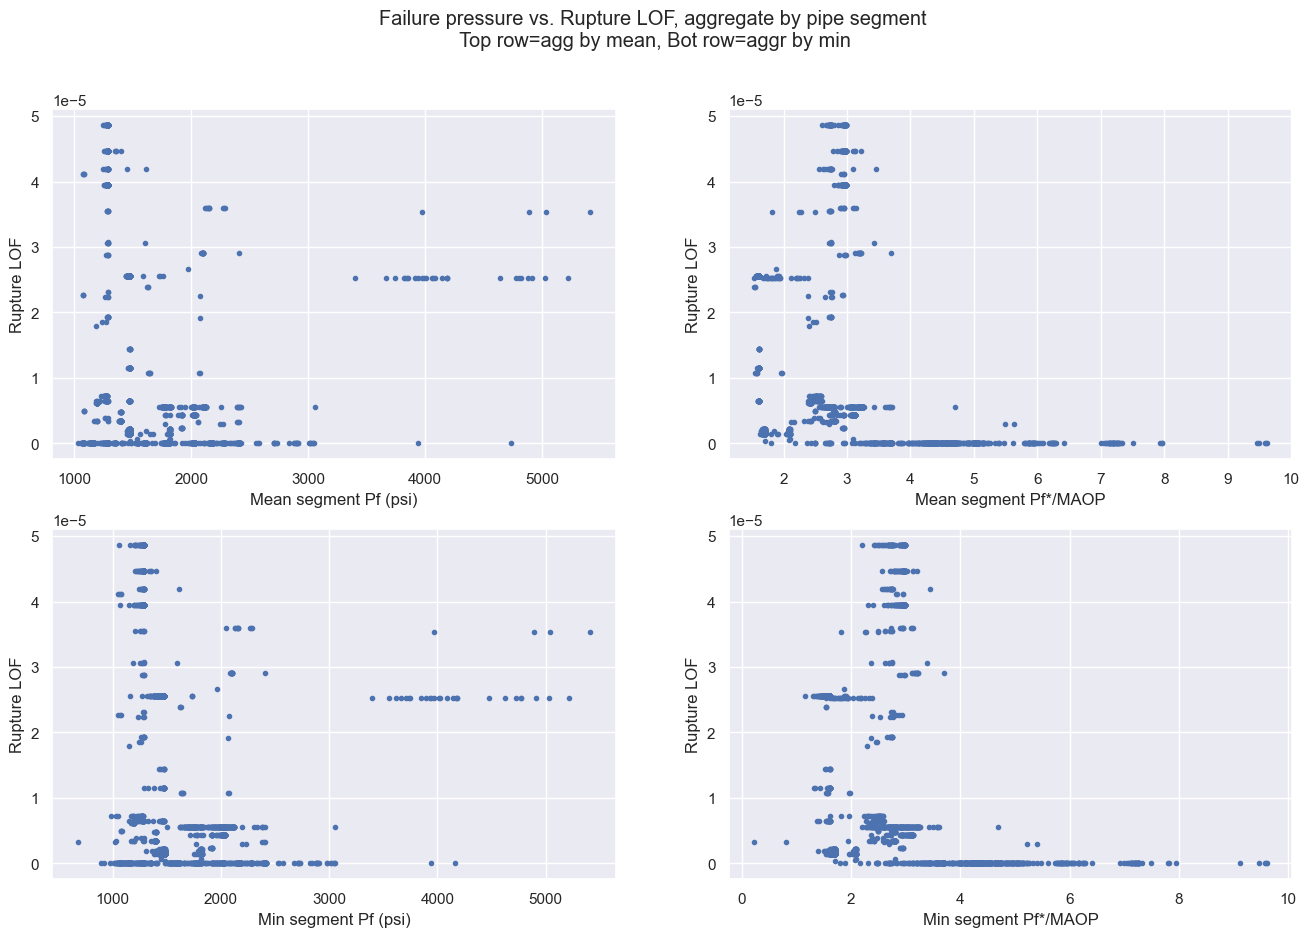

In [333]:
# Leak LOF:
y_field = "EC_LOF_Rupture"
y_label = "Rupture LOF"

plt.figure(figsize=(16, 10))

# Top row = mean aggregation 
plt.subplot(2, 2, 1)
plt.plot(
    filtered_performance_df_grouped_by_mean["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 2)
plt.plot(
    filtered_performance_df_grouped_by_mean["Pf*/MAOP"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
# plt.suptitle("Failure pressure vs. Leak LOF, aggregate by pipe segment")

# Bot row = min aggregation
plt.subplot(2, 2, 3)
plt.plot(
    filtered_performance_df_grouped_by_min["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 4)
plt.plot(
    filtered_performance_df_grouped_by_min["Pf*/MAOP"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

#### Make plots with regression lines

In [341]:
import matplotlib
def make_logscale_scatter_with_reg_line(
    df: pd.DataFrame,
    x_field: str,
    x_label: str,
    y_field: str,
    y_label: str,
    ax: matplotlib.axes._axes.Axes,
    robust: bool = False,
) -> None:
    """
    `df` contains the data to be plotted, which can be selected by
    `x_field` and `y_field`.

    An dditional column will be created called `log_<y_field>` and
    added to the data frame in place. The (x,y) scatter plot will be drawn
    as is, but with the y-axis set to log-scale. A regression line will be
    fitted with the form `log(Y) ~ X` and super imposed onto the scatter
    plot. In the end, the new field will be removed to prevent future errors.

    `ax` will contain the Axes object where the plot will be drawn.

    `robust` option will be passed to `sns.regplot`, if True, it will de-weight
    outliers.
    """
    # add a small constant to `y_field` so taking the log won't give errors
    # make sure small constant is much smaller than the smallest `y_field` value
    min_nonzero_y = df.loc[df[y_field] > 0, y_field].min()
    eps = min(min_nonzero_y * 1e-3, 1e-10)
    log_y_field = f"log_{y_field}"
    df[log_y_field] = np.log10(df[y_field] + eps)
    
    sns.regplot(
        x=x_field, y=log_y_field, data=df,
        line_kws={'color': 'red'},
        logx=False, 
        ax=ax,
        robust=robust,
    )
    ax.set_xlabel(x_label)
    ax.set_ylabel(f"log({y_label})")
    df.drop(log_y_field, axis=1, inplace=True)

def make_linear_scale_scatter_with_reg_line(
    df: pd.DataFrame,
    x_field: str,
    x_label: str,
    y_field: str,
    y_label: str,
    ax: matplotlib.axes._axes.Axes,
    robust: bool = False,
) -> None:
    """
    `df` contains the data to be plotted, which can be selected by
    `x_field` and `y_field`.

    The (x,y) scatter plot will be drawn as is.
    A regression line will be fitted with the form `Y ~ X` and super 
    imposed onto the scatter plot.
    In the end, the new field will be removed to prevent future errors.

    `ax` will contain the Axes object where the plot will be drawn.
    """       
    sns.regplot(
        x=x_field, y=y_field, data=df,
        line_kws={'color': 'red'},
        logx=False, 
        ax=ax,
        robust=robust,
    )
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Text(0.5, 0.98, 'Failure pressure vs. Leak LOF, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min')

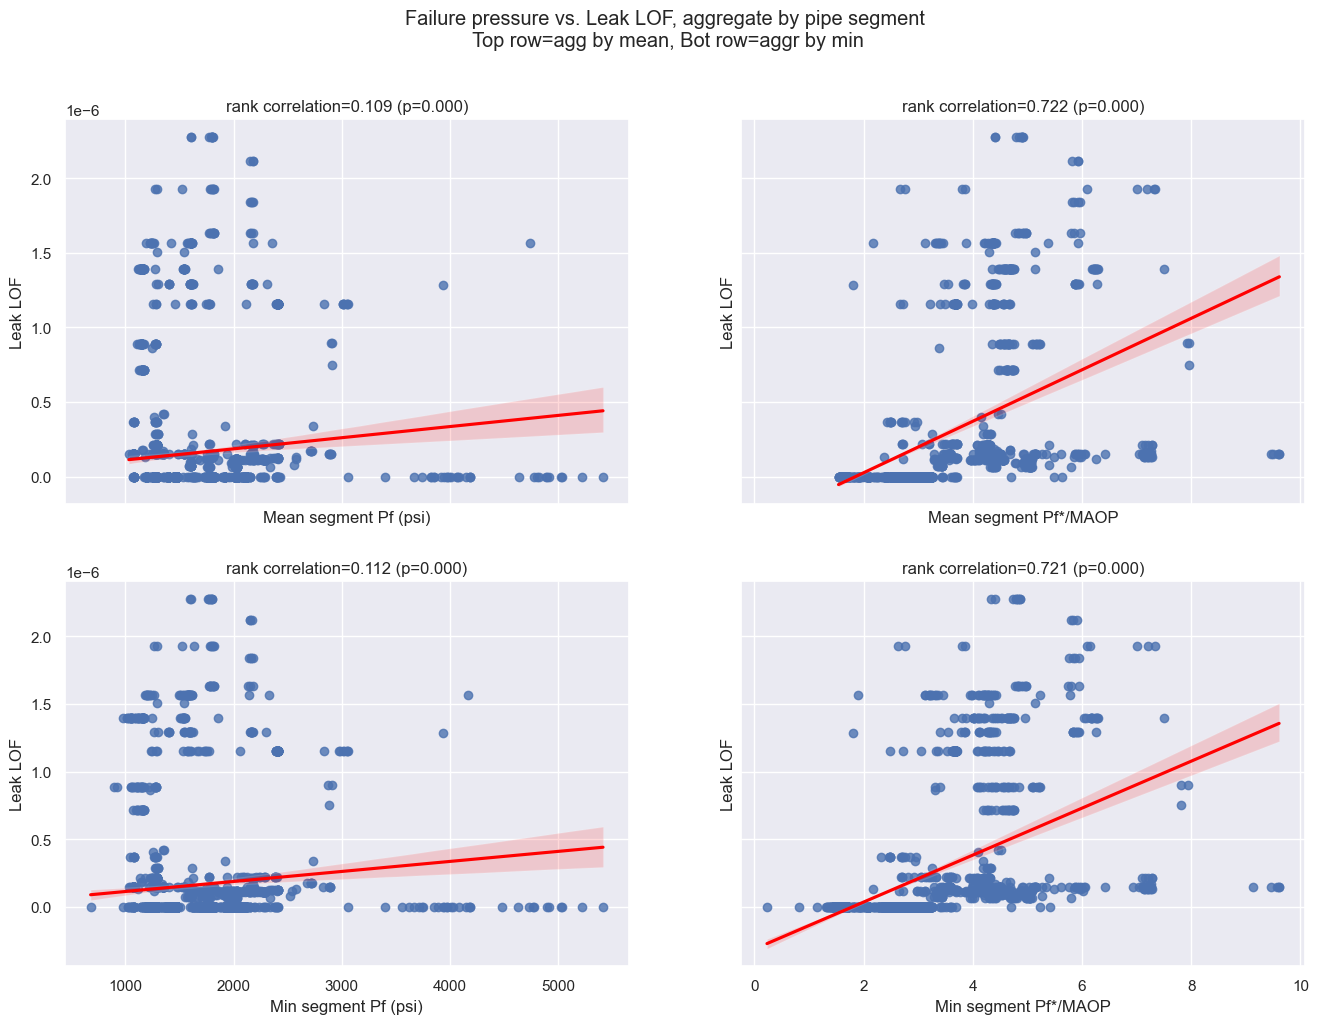

In [342]:
# Leak LOF:
x_field1 = "Estimated Failure Pressure (Pf)"
x_label1 = "Pf (psi)"
x_field2 = "Pf*/MAOP"
x_label2 = "Pf*/MAOP"

y_field = "EC_LOF_Leak"
y_label = "Leak LOF"

# plt.figure(figsize=(16, 10))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey="row", sharex="col", figsize=(16, 11))

# Top row = mean aggregation 
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Mean segment {x_label1}",
    y_label=y_label,
    ax=ax1,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field1],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax1.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Mean segment {x_label2}",
    y_label=y_label,
    ax=ax2,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field2],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax2.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

# Bot row = min aggregation
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Min segment {x_label1}",
    y_label=y_label,
    ax=ax3,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field1],
    filtered_performance_df_grouped_by_min[y_field],
)
ax3.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Min segment {x_label2}",
    y_label=y_label,
    ax=ax4,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field2],
    filtered_performance_df_grouped_by_min[y_field],
)
ax4.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")



Text(0.5, 0.98, 'Failure pressure vs. Rupture LOF, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min')

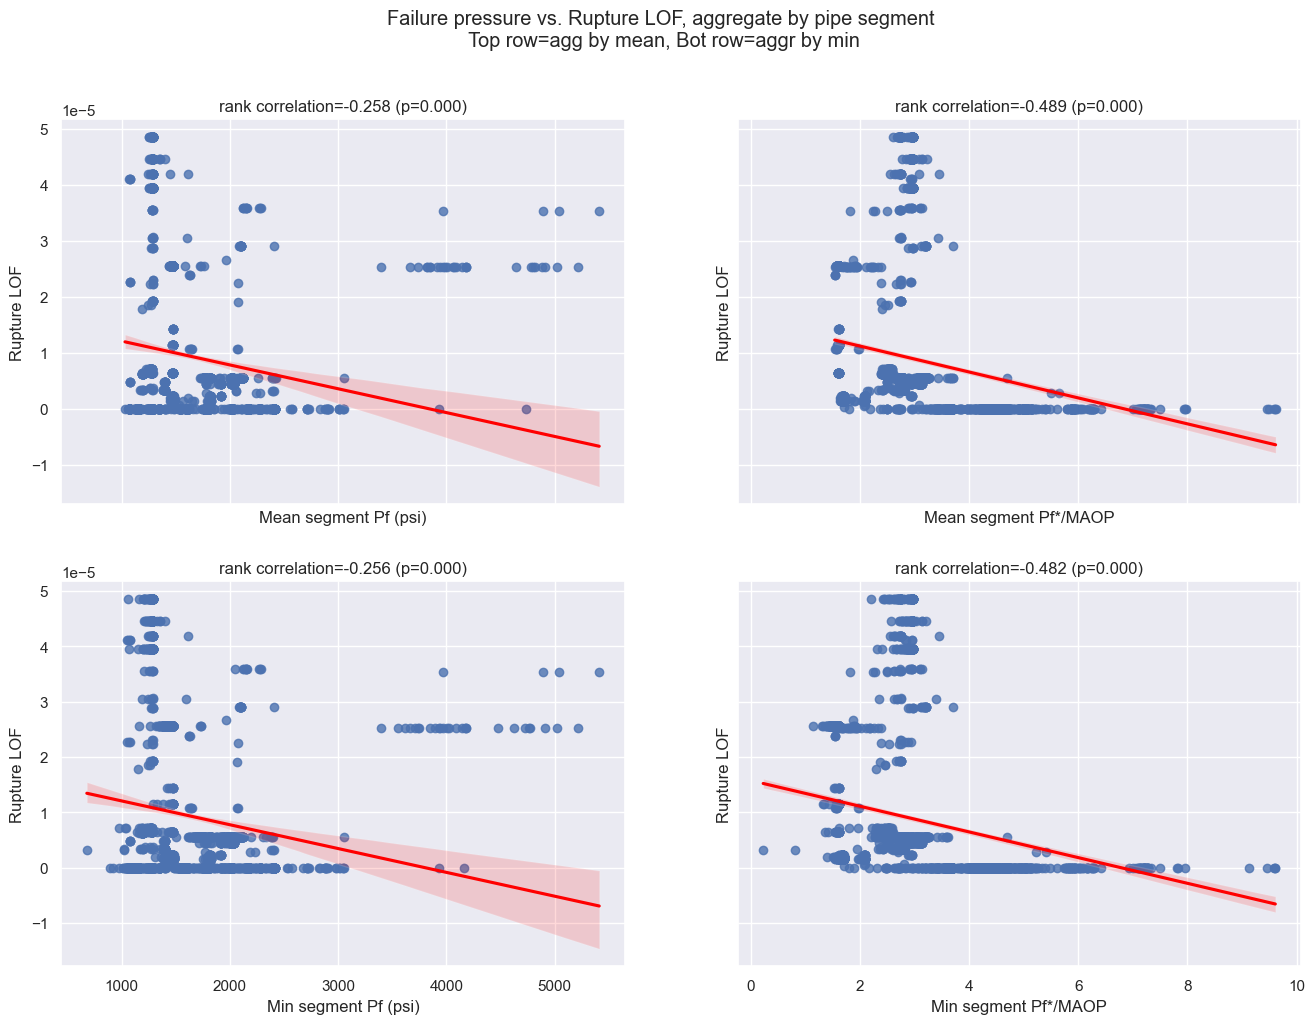

In [336]:
# Rupture LOF:
x_field1 = "Estimated Failure Pressure (Pf)"
x_label1 = "Pf (psi)"
x_field2 = "Pf*/MAOP"
x_label2 = "Pf*/MAOP"

y_field = "EC_LOF_Rupture"
y_label = "Rupture LOF"


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey="row", sharex="col", figsize=(16, 11))

# Top row = mean aggregation 
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Mean segment {x_label1}",
    y_label=y_label,
    ax=ax1,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field1],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax1.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Mean segment {x_label2}",
    y_label=y_label,
    ax=ax2,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field2],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax2.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

# Bot row = min aggregation
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Min segment {x_label1}",
    y_label=y_label,
    ax=ax3,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field1],
    filtered_performance_df_grouped_by_min[y_field],
)
ax3.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Min segment {x_label2}",
    y_label=y_label,
    ax=ax4,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field2],
    filtered_performance_df_grouped_by_min[y_field],
)
ax4.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

After aggregating over pipe segment, it looks like the Rupture LOF's correlation with failure pressure is closer to our expectations. However, for segments with a given failure pressure, the LOF can have a big range, suggesting high variance in risk prediction (not precise).

### ~~Look at this relationship against normalized volumetric loss~~

Not necessary because the failure pressure calculated from RSTRENG model are derived from corrosion dimensions